In [1]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import re
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Reviews/Reviews1.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Date,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,29-04-2011,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,09-09-2012,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,20-08-2008,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,15-06-2011,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,23-10-2012,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

/usr/local/lib/python3.7/dist-packages/spacy/language.py:1899: UserWarning: [W123] Argument disable with value ['parser', 'ner'] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  config_value=config["nlp"][key],


In [6]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 36.6 MB/s 
     |████████████████████████████████| 287 kB 61.3 MB/s 


In [7]:
!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 5.6 MB/s 
  Using cached pybind11-2.10.1-py3-none-any.whl (216 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3162371 sha256=65721f15c795e128fec843e439be9bc08eb2d1e844c1cd3bd3a65bedea811f56
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [8]:
import pandas as pd
import numpy as np
import nltk
import string
import fasttext
import contractions
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
plt.xticks(rotation=70)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
%matplotlib inline

In [9]:
for col in df.columns:
    print(col, df[col].isnull().sum())

Id 0
ProductId 0
UserId 0
ProfileName 16
HelpfulnessNumerator 0
HelpfulnessDenominator 0
Score 0
Time 0
Date 0
Summary 27
Text 0


In [10]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Date                       0
Summary                   27
Text                       0
dtype: int64

In [11]:
rws = df.loc[:, ['ProductId','Summary','Text']]

In [12]:
#Expanding Contradictions
rws['Summary'] = rws['Text'].apply(lambda x: [contractions.fix(word) for word in x.split()])
rws.head()

,ProductId,Summary,Text
0,B001E4KFG0,"[I, have, bought, several, of, the, Vitality, canned, dog, food, products, and, have, found, the...",I have bought several of the Vitality canned dog food products and have found them all to be of ...
1,B00813GRG4,"[Product, arrived, labeled, as, Jumbo, Salted, Peanuts...the, peanuts, were, actually, small, si...",Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted...
2,B000LQOCH0,"[This, is, a, confection, that, has, been, around, a, few, centuries., It, is, a, light,, pillow...","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelati..."
3,B000UA0QIQ,"[If, you, are, looking, for, the, secret, ingredient, in, Robitussin, I, believe, I, have, found...",If you are looking for the secret ingredient in Robitussin I believe I have found it. I got thi...
4,B006K2ZZ7K,"[Great, taffy, at, a, great, price., There, was, a, wide, assortment, of, yummy, taffy., Deliver...",Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very qu...


In [13]:
rws['review_description_str'] = [' '.join(map(str, l)) for l in rws['Summary']]
rws.head()

,ProductId,Summary,Text,review_description_str
0,B001E4KFG0,"[I, have, bought, several, of, the, Vitality, canned, dog, food, products, and, have, found, the...",I have bought several of the Vitality canned dog food products and have found them all to be of ...,I have bought several of the Vitality canned dog food products and have found them all to be of ...
1,B00813GRG4,"[Product, arrived, labeled, as, Jumbo, Salted, Peanuts...the, peanuts, were, actually, small, si...",Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted...,Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted...
2,B000LQOCH0,"[This, is, a, confection, that, has, been, around, a, few, centuries., It, is, a, light,, pillow...","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelati...","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin..."
3,B000UA0QIQ,"[If, you, are, looking, for, the, secret, ingredient, in, Robitussin, I, believe, I, have, found...",If you are looking for the secret ingredient in Robitussin I believe I have found it. I got thi...,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this...
4,B006K2ZZ7K,"[Great, taffy, at, a, great, price., There, was, a, wide, assortment, of, yummy, taffy., Deliver...",Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very qu...,Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quic...


In [14]:
# Define text preprocessing function
def clean(text):
    import html
    import string
    import nltk
    nltk.download('wordnet')
    
    line = html.unescape(text)
    line = line.replace("can't", 'can not')
    line = line.replace("n't", " not")
    # Pad punctuations with white spaces
    pad_punct = str.maketrans({key: " {0} ".format(key) for key in string.punctuation}) 
    line = line.translate(pad_punct)
    line = line.lower()
    line = line.split() 
    lemmatizer = nltk.WordNetLemmatizer()
    line = [lemmatizer.lemmatize(t) for t in line] 
    
    # Negation handling
    # Add "not_" prefix to words behind "not", or "no" until the end of the sentence
    tokens = []
    negated = False
    for t in line:
        if t in ['not', 'no']:
            negated = not negated
        elif t in string.punctuation or not t.isalpha():
            negated = False
        else:
            tokens.append('not_' + t if negated else t)
    
    invalidChars = str(string.punctuation.replace("_", ""))  
    bi_tokens = list(nltk.bigrams(line))
    bi_tokens = list(map('_'.join, bi_tokens))
    bi_tokens = [i for i in bi_tokens if all(j not in invalidChars for j in i)]
    tri_tokens = list(nltk.trigrams(line))
    tri_tokens = list(map('_'.join, tri_tokens))
    tri_tokens = [i for i in tri_tokens if all(j not in invalidChars for j in i)]
    tokens = tokens + bi_tokens + tri_tokens      
    
    return tokens

In [15]:
example = clean("I don't liked the food")
print(example)

[nltk_data] Downloading package wordnet to /root/nltk_data...


['i', 'do', 'not_liked', 'not_the', 'not_food', 'i_do', 'do_not', 'not_liked', 'liked_the', 'the_food', 'i_do_not', 'do_not_liked', 'not_liked_the', 'liked_the_food']


In [16]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 35 kB/s 
     |████████████████████████████████| 199 kB 9.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845514 sha256=208bd66ebc161714ec1610892cdc4422e4f39be15862ffbf2b47a2c552946a93
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


In [17]:
from pyspark.shell import spark
spark.conf.set('spark.sql.shuffle.partitions', '8')

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 3.3.1
      /_/

Using Python version 3.7.15 (default, Oct 12 2022 19:14:55)
Spark context Web UI available at http://67829ad8f94c:4040
Spark context available as 'sc' (master = local[*], app id = local-1668578621627).
SparkSession available as 'spark'.


In [18]:
# importing packages
import pandas as pd

# create data
df1 = pd.DataFrame(df)

# view data
display(df1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Date,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,29-04-2011,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of ...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,09-09-2012,Not as Advertised,Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,20-08-2008,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelati..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,15-06-2011,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got thi...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,23-10-2012,Great taffy,Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very qu...
...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,03-01-1970,Will not do without,Great for sesame chicken..this is a good if not better than resturants I have eaten at..My husba...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,03-01-1970,disappointed,I'm disappointed with the flavor. The chocolate notes are especially weak. Milk thickens it but ...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,03-01-1970,Perfect for our maltipoo,"These stars are small, so you can give 10-15 of those in one training session. I tried to train..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,03-01-1970,Favorite Training and reward treat,These are the BEST treats for training and rewarding your dog for being good while grooming. Lo...


In [19]:
# Using groupby() and count()
df2 = df1.groupby(['Score'])['Score'].count()
df2.head()

Score
1     52268
2     29769
3     42640
4     80655
5    363122
Name: Score, dtype: int64

In [20]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 4.0 MB/s 
     |████████████████████████████████| 5.5 MB 50.7 MB/s 
     |████████████████████████████████| 1.3 MB 43.8 MB/s 
     |████████████████████████████████| 163 kB 43.9 MB/s 
     |████████████████████████████████| 7.6 MB 48.6 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=50423fec422869833fefd527818c874544c5aedc73ab0e493b192ea098f4621d
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
import codecs
import csv
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
 
stop_words = set(stopwords.words('english')) 

In [23]:
from spacy.lang.en import English

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

text = """He determined to drop his litigation with the monastry, and relinguish his claims to the wood-cuting and 
fishery rihgts at once. He was the more ready to do this becuase the rights had become much less valuable, and he had 
indeed the vaguest idea where the wood and river in question were."""

#  "nlp" Object is used to create documents with linguistic annotations.
my_doc = nlp(text)

# Create list of word tokens
token_list = []
for token in my_doc:
    token_list.append(token.text)

from spacy.lang.en.stop_words import STOP_WORDS

# Create list of word tokens after removing stopwords
filtered_sentence =[] 

for word in token_list:
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
        filtered_sentence.append(word) 
print(token_list)
print(filtered_sentence)  

['He', 'determined', 'to', 'drop', 'his', 'litigation', 'with', 'the', 'monastry', ',', 'and', 'relinguish', 'his', 'claims', 'to', 'the', 'wood', '-', 'cuting', 'and', '\n', 'fishery', 'rihgts', 'at', 'once', '.', 'He', 'was', 'the', 'more', 'ready', 'to', 'do', 'this', 'becuase', 'the', 'rights', 'had', 'become', 'much', 'less', 'valuable', ',', 'and', 'he', 'had', '\n', 'indeed', 'the', 'vaguest', 'idea', 'where', 'the', 'wood', 'and', 'river', 'in', 'question', 'were', '.']
['determined', 'drop', 'litigation', 'monastry', ',', 'relinguish', 'claims', 'wood', '-', 'cuting', '\n', 'fishery', 'rihgts', '.', 'ready', 'becuase', 'rights', 'valuable', ',', '\n', 'vaguest', 'idea', 'wood', 'river', 'question', '.']


In [24]:
!pip3 install sentence_transformers
#!pip3 install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
!pip install -U spacy
!python -m spacy download en_core_web_lg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 26.5 MB/s 
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.2
    Uninstalling spacy-3.4.2:
      Successfully uninstalled spacy-3.4.2


2022-11-16 06:04:33.343768: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 17 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [26]:
print(df.iloc[123]['Text'])
print(df.iloc[1243]['Text'])
print(df.iloc[23]['Text'])
print(df.iloc[389]['Text'])

Before I was educated about feline nutrition, I allowed my cats to become addicted to dry cat food. I always offered both canned and dry, but wish I would have fed them premium quality canned food and limited dry food. I have two 15 year old cats and two 5 year old cats. The only good quality dry foods they will eat are Wellness and Innova. Innova's manufacturer was recently purchased by Procter&Gamble. I began looking for a replacement. After once again offering several samples (from my local holistic pet store) Holistic Select was the only one (other than the usual Wellness and Innova) they would eat. For finicky cats, I recommend trying Holistic Select. It is a good quality food that is very palatable for finicky eaters.
I just received my shipment and could hardly wait to try this product. We love &quot;slickers&quot; which is what we call them, instead of stickers because they can be removed so easily. My daughter designed signs to be  printed in reverse to use on her car windows.

In [27]:
# starts 4-5: Positive(1), stars 1-2: Negative(3), stars 3: Neutral(2) 
def map_sentiment(rating):
    if(int(rating)==3):
        return 2
    elif(int(rating)<3):
        return 3
    else:
        return 1  
          
df['Score']
review_sentiments=[map_sentiment(s) for s in df['Score']]
df['sentiments']=review_sentiments

In [28]:
df.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Date                       0
Summary                   27
Text                       0
sentiments                 0
dtype: int64

In [29]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Date,Summary,Text,sentiments
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,29-04-2011,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of ...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,09-09-2012,Not as Advertised,Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted...,3
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,20-08-2008,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelati...",1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,15-06-2011,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got thi...,3
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,23-10-2012,Great taffy,Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very qu...,1


In [30]:
df['Date']=pd.to_datetime(df['Date'])
df.value_counts(['ProductId'])

ProductId 
B007JFMH8M    913
B002QWP89S    632
B002QWP8H0    632
B002QWHJOU    632
B0026RQTGE    632
             ... 
B0029TATL0      1
B0029TJR7M      1
B0029U7OBM      1
B0029USWFE      1
B009WVB40S      1
Length: 74258, dtype: int64

Most Reviewed Brand

In [31]:
# Get most review business ids
ids=df.value_counts(['ProductId'])
ids=[list(ids.index[i])[0] for i in range(len(ids))]

In [32]:
data0=df[df['ProductId']==ids[0]]
data1=df[df['ProductId']==ids[1]]
data2=df[df['ProductId']==ids[2]]
data3=df[df['ProductId']==ids[3]]
data4=df[df['ProductId']==ids[4]]
data=pd.concat([data0,data1,data2,data3,data4])
len(data)
data.to_csv('review_business_merge.csv')

In [33]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Date,Summary,Text,sentiments
562970,562971,B007JFMH8M,A368Z46FIKHSEZ,"jaimoi ""Appreciator of good music""",0,0,5,1343433600,2011-03-01,Delicious!,I love these cookies! Not only are they healthy but they taste great and are so soft! I will d...,1
562971,562972,B007JFMH8M,A1JAPP1CXRG57A,"Linda Painchaud-Steinman ""PARK EDGE BOOKS""",0,0,5,1343433600,2011-05-08,Great Anytime of Day!,"Quaker Soft Baked Oatmeal Cookies with raisins are a delicious treat, great for anytime of day. ...",1
562972,562973,B007JFMH8M,A2Z9JNXPIEL2B9,carwash169,0,0,5,1343433600,2011-03-13,Very good!,"I am usually not a huge fan of oatmeal cookies, but these literally melt in your mouth. They are...",1
562973,562974,B007JFMH8M,A31CYJQO3FL586,"P. Titus ""Knitgirlll""",0,0,5,1343433600,2012-10-19,Quaker Oats Oatmeal Raisin Mom Voxbox Review Courtesy of Influenster,"I participated in a product review that included a sample of <a href=""http://www.amazon.com/gp/p...",1
562974,562975,B007JFMH8M,A2KXQ2EKFF3K2G,Jessica,0,0,5,1343433600,2011-05-17,"Quick, simple HEALTHY snack for the kiddos!!!",My kids loved these. I was very pleased to give my kids a quick on the go healthy snack before s...,1


In [34]:
data_most_reviewed_store=df[df['ProductId']=='B007JFMH8M'].sort_values(by=['Time'])
data_most_reviewed_store.shape
business_rating=data_most_reviewed_store.iloc[0]['Score']
print('Overall rating of the store:',business_rating)

Overall rating of the store: 5


In [35]:
# Import necessary libraries
import pandas as pd
import plotly as py
import cufflinks
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS
from branca.element import Figure
import folium 
import matplotlib.pyplot as pPlot
import numpy as npy
from PIL import Image
from IPython.display import Image as img

In [36]:
# Visualize the ratings

rating_5=len(df[df['Score']==5])
rating_4=len(df[df['Score']==4])
rating_3=len(df[df['Score']==3])
rating_2=len(df[df['Score']==2])
rating_1=len(df[df['Score']==1]) 
def getStarRatings():             
    fig = go.Figure()
    fig.add_trace(go.Bar(
            y=[1],
            x=[rating_1],
            name='1',
            orientation='h',marker=dict(
        color='rgb(255, 51, 51)'
    )))
    fig.add_trace(go.Bar(
            y=[2],
            name='2',
            x=[rating_2],
            orientation='h',marker=dict(
        color='rgb(255, 92, 51)'
    )))
    fig.add_trace(go.Bar(
            y=[3],
            name='3',
            x=[rating_3],
            orientation='h',marker=dict(
        color='rgb(255, 255, 77)'
    )))
    fig.add_trace(go.Bar(
            y=[4],
            name='4',
            x=[rating_4],
            orientation='h',marker=dict(
        color='rgb(77, 255, 166)'
    )))
    fig.add_trace(go.Bar(
            y=[5],
            name='5',
            x=[rating_5],
            orientation='h',marker=dict(
        color='rgb(166, 255, 77)'
        
     ))),
    fig.update_layout(
     autosize=False,
     width=500,
     height=500,
     title='Distribution of Review Ratings'
    )
    return fig
getStarRatings()

In [37]:
print('No of positive Review:',str(len(df[df['sentiments']==1])))
print('No of negative Review:',str(len(df[df['sentiments']==3])))
print('No of neutral Review:',str(len(df[df['sentiments']==2])))
sentimments_dict={3:'Negative',2:'Neutral',1:'Positive'}
sentiment_names=[sentimments_dict[int(i)] for i in data_most_reviewed_store['sentiments'].values]
data_most_reviewed_store['sentiment_name']=sentiment_names
fig = px.pie(data_most_reviewed_store, values='sentiments', names='sentiment_name',color='sentiment_name',color_discrete_map={'Neutral':'yellow','Negative':'cyan','Positive':'green'})
fig.update_layout(
     autosize=False,
     title='Distribution of Review Sentiments'
    )
fig.show()

No of positive Review: 443777
No of negative Review: 82037
No of neutral Review: 42640


In [38]:
date_str=[en.strftime('%Y') for  en in data_most_reviewed_store['Date']]
data_most_reviewed_store['Date_year']=date_str
# Sum the number of reviews per year
data_most_reviewed_store_timeseries_pos=data_most_reviewed_store[data_most_reviewed_store['sentiments']==1].groupby('Date_year')['Date_year','sentiments'].sum()
data_most_reviewed_store_timeseries_neg=data_most_reviewed_store[data_most_reviewed_store['sentiments']==3].groupby('Date_year')['Date_year','sentiments'].sum()
data_most_reviewed_store_timeseries_neu=data_most_reviewed_store[data_most_reviewed_store['sentiments']==2].groupby('Date_year')['Date_year','sentiments'].sum()
data_most_reviewed_store_timeseries_pos['Rating']=['Positive' for i in range(len(data_most_reviewed_store_timeseries_pos))]
data_most_reviewed_store_timeseries_neg['Rating']=['Negative' for i in range(len(data_most_reviewed_store_timeseries_neg))]
data_most_reviewed_store_timeseries_neu['Rating']=['Neutral' for i in range(len(data_most_reviewed_store_timeseries_neu))]
data_most_reviewed_store_timeseries=pd.concat([data_most_reviewed_store_timeseries_pos,data_most_reviewed_store_timeseries_neg])
data_most_reviewed_store_timeseries=pd.concat([data_most_reviewed_store_timeseries,data_most_reviewed_store_timeseries_neu])
# No of reviews per year
data_most_reviewed_store_timeseries['Year']=data_most_reviewed_store_timeseries.index
data_most_reviewed_store_timeseries.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,sentiments,Rating,Year
Date_year,,,
2004,2,Positive,2004
2005,1,Positive,2005
2006,7,Positive,2006
2007,27,Positive,2007
2008,37,Positive,2008


In [39]:
from plotly.subplots import make_subplots
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(data_most_reviewed_store_timeseries.index), 
                         y=data_most_reviewed_store_timeseries_pos['sentiments'],
                         mode='lines',
                         name='positive',
                         line=dict(color='rgb(0,245,153)', width=1)))
fig.add_trace(go.Scatter(x=list(data_most_reviewed_store_timeseries.index), 
                         y=data_most_reviewed_store_timeseries_neg['sentiments'],
                         mode='lines',
                         name='negative',
                         line=dict(color='rgb(255, 102, 102)', width=1)))
fig.add_trace(go.Scatter(x=list(data_most_reviewed_store_timeseries.index), 
                         y=data_most_reviewed_store_timeseries_neu['sentiments'],
                         mode='lines',
                         name='neutral',
                         line=dict(color='rgb(102, 102, 255)', width=1)))
fig.update_layout(
     autosize=False,
     title='Trend of sentiments over time'
    )

In [40]:
fig = px.bar(data_most_reviewed_store_timeseries.tail(30), x='Year', y='sentiments',color='Rating')
fig.update_layout(
     autosize=False,
     title='Trend of sentiments over time - Bar Graph'
    )
fig.show()

In [41]:
corpus_pos=" ".join(list(data_most_reviewed_store[data_most_reviewed_store['sentiments']==1]['Text']))
corpus_neg=" ".join(list(data_most_reviewed_store[data_most_reviewed_store['sentiments']==2]['Text']))

In [42]:
STOPWORDS.add("doughnut")
STOPWORDS.add("donuts")
STOPWORDS.add("voodoo")

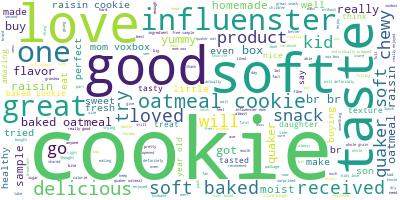

In [43]:
def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", max_words = 15000, stopwords = set(STOPWORDS))
    cloud.generate(string)
    cloud.to_file("wordCloud.png")

# Postitive
create_word_cloud(corpus_pos.lower())
img('/content/wordCloud.png')

In [44]:
STOPWORDS.add("good")
STOPWORDS.add("taste")
STOPWORDS.add("soft")
STOPWORDS.add("liked")
STOPWORDS.add("love")
STOPWORDS.add("raisin")
STOPWORDS.add("raisins")
STOPWORDS.add("tasty")
STOPWORDS.add("oatmeal")
STOPWORDS.add("baked")

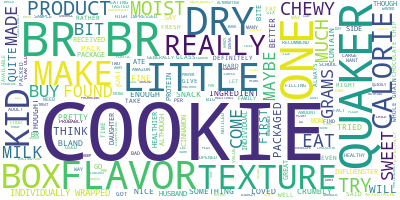

In [45]:
create_word_cloud(corpus_neg.upper())
img('/content/wordCloud.png')

In [46]:
# Import Necessary Libraries
import re
import nltk
import numpy as np
import itertools
import pickle
import spacy
from tqdm.notebook import tqdm as tqdm
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm_notebook as tqdm
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
from sentence_transformers import SentenceTransformer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
# Stopwards
stopwords = list(set(stopwords.words("english")))
stopwords+=['voodoo','doughnuts','doughnut']

In [48]:
# Filtering the dataset based on Review Sentiments
positive_reviews=data_most_reviewed_store[data_most_reviewed_store['sentiments']==1]
negative_reviews=data_most_reviewed_store[data_most_reviewed_store['sentiments']==3]
neutral_reviews=data_most_reviewed_store[data_most_reviewed_store['sentiments']==2]

In [49]:
# Method to preprocess the data
def preprocess(data):
    # Preprocessing Texts
    preprocessed_texts = []
    lem = WordNetLemmatizer()
    # Cleaing the data, removing stopwords
    for sent in tqdm(data):
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = re.sub('[^A-Za-z ]+', ' ', sent)
        # lemmatizing
        sent=' '.join(lem.lemmatize(word) for word in sent.split() if word not in stopwords )
        preprocessed_texts.append(sent.lower().strip())
    return preprocessed_texts

preprocessed_texts_neg=preprocess(negative_reviews['Text'].values)
preprocessed_texts_pos=preprocess(positive_reviews['Text'].values)
preprocessed_texts_neu=preprocess(neutral_reviews['Text'].values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/841 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

In [50]:
preprocessed_texts_pos[67]

'got free sample via influenster quaker soft baked oatmeal cookie raisin flavor first soft crumbly secondly strong cinnamon flavor thirdly raisin actually good add texture if like oatmeal cooky like product'

In [51]:
# Import Necessary Libraries
import re
import nltk
import numpy as np
import itertools
import spacy
from tqdm.notebook import tqdm as tqdm
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
from sentence_transformers import SentenceTransformer
from nltk.corpus import stopwords

class CustomerReviewKeywords1:
    # Method to preprocess the data
    stopwords_ = list(set(stopwords.words("english")))
    stopwords_+=['voodoo','doughnuts','doughnut','voodoodoughnut']
    def preprocess(self,data,stopwords):
        # Preprocessing Texts
        preprocessed_texts = []
        lem = WordNetLemmatizer()
        # Cleaing the data, removing stopwords
        for sent in data:
            sent = sent.replace('\\r', ' ')
            sent = sent.replace('\\"', ' ')
            sent = sent.replace('\\n', ' ')
            sent = re.sub('[^A-Za-z ]+', ' ', sent)
            # lemmatizing
            sent=' '.join(word for word in sent.split() if word not in stopwords)
            preprocessed_texts.append(sent.lower().strip())
        return preprocessed_texts
    
    def max_sum_sim(self,doc_embedding, candidate_embeddings, candidates, top_n, nr_candidates):
        # Calculate distances and extract keywords
        distances = cosine_similarity(doc_embedding, candidate_embeddings)
        distances_candidates = cosine_similarity(candidate_embeddings, 
                                            candidate_embeddings)

        # Get top_n words as candidates based on cosine similarity
        words_idx = list(distances.argsort()[0][-nr_candidates:])
        words_vals = [candidates[index] for index in words_idx]
        distances_candidates = distances_candidates[np.ix_(words_idx, words_idx)]

        # Calculate the combination of words that are the least similar to each other
        min_sim = np.inf
        candidate = None
        for combination in itertools.combinations(range(len(words_idx)), top_n):
            sim = sum([distances_candidates[i][j] for i in combination for j in combination if i != j])
            if sim < min_sim:
                candidate = combination
                min_sim = sim
        return [words_vals[idx] for idx in candidate]

    # Diversify the keywords using max sum similarity, higher the value of nr_candidates higher the diversity
    def extract_keywords_bert_diverse(self,doc,stopwords,top_n=10,nr_candidates=20):
        n_gram_range = (1,1)
        # Extract candidate words/phrases using count vectorizer (TF-IDF Scores)
        count = CountVectorizer(ngram_range=n_gram_range, stop_words=stopwords).fit([doc])
        candidates = count.get_feature_names()
        # Embeddings of the document using Bert    
        model = SentenceTransformer('distilbert-base-nli-mean-tokens')
        doc_embedding = model.encode([doc])
        candidate_embeddings = model.encode(candidates)
        keywords=self.max_sum_sim(doc_embedding, candidate_embeddings, candidates, top_n, nr_candidates)
        return keywords 

    # Method to get the trending keywords
    def get_trending_keywords(self,data_most_reviewed_store,num_keywords=5):
        # Stopwards
        stopwords_ = list(set(stopwords.words("english")))
        stopwords_+=['voodoo','doughnuts','doughnut','voodoodoughnut','donut','donuts']
        # Filtering the dataset based on Review Sentiments
        positive_reviews=data_most_reviewed_store[data_most_reviewed_store['sentiments']==1]
        negative_reviews=data_most_reviewed_store[data_most_reviewed_store['sentiments']==3]
        neutral_reviews=data_most_reviewed_store[data_most_reviewed_store['sentiments']==2]
        preprocessed_texts_neg=self.preprocess(negative_reviews['Text'].values,stopwords_)
        preprocessed_texts_pos=self.preprocess(positive_reviews['Text'].values,stopwords_)
        preprocessed_texts_neu=self.preprocess(neutral_reviews['Text'].values,stopwords_)  
        keywords={}
        corpus=' '.join(preprocessed_texts_pos[-500::])
        keywords['positive']=self.extract_keywords_bert_diverse(corpus,stopwords_,num_keywords)
        corpus=' '.join(preprocessed_texts_neg[-500::])
        keywords['negative']=self.extract_keywords_bert_diverse(corpus,stopwords_,num_keywords)
        return keywords

In [52]:
ck=CustomerReviewKeywords1()
data_most_reviewed_store=df[df['ProductId']==ids[5]].sort_values(by=['Date'])
kw=ck.get_trending_keywords(data_most_reviewed_store,5)
kw

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/450 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



{'positive': ['healthier', 'pineapple', 'vegetarian', 'cookies', 'sunscreen'],
 'negative': ['cooking', 'sickness', 'amazon', 'teaspoon', 'coconut']}

In [53]:
df1=pd.DataFrame(columns=['id','pos_keywords','neg_keywords'])
review_ids=[]
pos_keywords=[]
neg_keywords=[]

for i in range(10):
    ck=CustomerReviewKeywords1()
    data_most_reviewed_store=df[df['ProductId']==ids[int(i)]].sort_values(by=['Date'])
    kw=ck.get_trending_keywords(data_most_reviewed_store,num_keywords=5)
    review_ids.append(ids[int(i)])
    pos_keywords.append(kw['positive'])
    neg_keywords.append(kw['negative'])
df1['id']=review_ids
df1['pos_keywords']=pos_keywords
df1['neg_keywords']=neg_keywords
df1.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/usr/local/lib/python3.7/dist-packages/s

,id,pos_keywords,neg_keywords
0,B007JFMH8M,"[tasty, christmas, walmart, baking, vegan]","[corn, tasty, sawdust, cholesterol, pancakes]"
1,B002QWP89S,"[walmart, steak, puppies, lovessssssssssssssssssss, tunafish]","[corn, cancer, diarrhea, puppies, petsmart]"
2,B002QWP8H0,"[lovessssssssssssssssssss, steak, puppies, tunafish, petsmart]","[cancer, butter, puppies, dinner, petsmart]"
3,B002QWHJOU,"[cheapest, cats, puppies, steak, tunafish]","[killing, puppies, diarrhea, google, petsmart]"
4,B0026RQTGE,"[walmart, steak, puppies, lovessssssssssssssssssss, tunafish]","[corn, cancer, diarrhea, puppies, petsmart]"


In [54]:
data_most_reviewed_store.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Date', 'Summary', 'Text',
       'sentiments'],
      dtype='object')

In [55]:
def recent_reviews(review_business_data_merged,id):
    data_most_reviewed_store=review_business_data_merged[review_business_data_merged['ProductId']==id].sort_values(by=['Date'],ascending=False)
    sentimments_dict={3:'Negative',2:'Neutral',1:'Positive'}
    sentiment_names=[sentimments_dict[int(i)] for i in data_most_reviewed_store['sentiments'].values]
    data_most_reviewed_store['sentiment']=sentiment_names
    data_most_reviewed_store=data_most_reviewed_store.drop(columns=['ProductId','UserId','ProfileName'])
    data_most_reviewed_store=data_most_reviewed_store[['Text','sentiment','Date','Score']]
    data_most_reviewed_store=data_most_reviewed_store.rename(columns={'Score':'Rating','Text':'Review'})
    return data_most_reviewed_store

recent_reviews(df,ids[1])

,Review,sentiment,Date,Rating
21035,I have two 6 month old dobemans who asked me to rate Greenies 6 out of five. It is yet to be see...,Positive,2012-12-10,5
21067,I have a (now) 6 month old miniature daschund puppy. I bought these for her about two months ago...,Positive,2012-12-09,4
21066,my german shepherd goes crazy for these things. i have no idea why he likes them so much. his br...,Positive,2012-12-09,4
21068,We have been feeding these to our do since he became an adult dog. We feed him the Jumbo size G...,Positive,2012-12-09,5
21104,"For a picky boxer that doesn't like or eat many treats, she is addicted to these! They aren't v...",Positive,2012-12-08,5
...,...,...,...,...
21414,"My dogs love these, and everything I've read suggests that they're good for the dogs, especially...",Positive,2008-06-29,5
21197,"Any edible bone can cause a dog to choke, but Greenies changed their formula about a year ago to...",Positive,2008-06-27,5
21082,I have been feeding our dogs Greenie bones since they first came out and we have NEVER had a pro...,Positive,2008-05-08,5
21510,These treats occupy my dogs (quietly!) while they clean their teeth at the same time. The first ...,Positive,2008-04-18,5


In [56]:
import pyspark
spark.conf.set('spark.sql.shuffle.partitions', '8')

In [57]:
# load .csv data
kindle_csv = spark.read.format("csv").option('header','true').load("/content/drive/MyDrive/Reviews/Reviews1.csv")

In [58]:
kindle_csv.show()

+---+----------+--------------+--------------------+--------------------+----------------------+-----+----------+----------+--------------------+--------------------+
| Id| ProductId|        UserId|         ProfileName|HelpfulnessNumerator|HelpfulnessDenominator|Score|      Time|      Date|             Summary|                Text|
+---+----------+--------------+--------------------+--------------------+----------------------+-----+----------+----------+--------------------+--------------------+
|  1|B001E4KFG0|A3SGXH7AUHU8GW|          delmartian|                   1|                     1|    5|1303862400|29-04-2011|Good Quality Dog ...|I have bought sev...|
|  2|B00813GRG4|A1D87F6ZCVE5NK|              dll pa|                   0|                     0|    1|1346976000|09-09-2012|   Not as Advertised|"Product arrived ...|
|  3|B000LQOCH0| ABXLMWJIXXAIN|"Natalia Corres "...|                   1|                     1|    4|1219017600|20-08-2008|"""Delight"" says...|"This is a confec...

In [59]:
#negative (label = 1)  positive (label = 0)
kindle_csv.createOrReplaceTempView('kindle_view')

data_csv = spark.sql('''
  SELECT CASE WHEN Score<4 THEN 1
          ELSE 0
          END as label,
          Text as text
  FROM kindle_view
  WHERE length(text)>2''')

data_csv.groupBy('label').count().show()

+-----+------+
|label| count|
+-----+------+
|    1|126125|
|    0|442316|
+-----+------+



In [60]:
# Sampling data
pos = data_csv.where('label=0').sample(False, 0.25, seed=1220)
neg = data_csv.where('label=1').sample(False, 0.8, seed=1220)
data = pos.union(neg)
data.groupBy('label').count().show()

+-----+------+
|label| count|
+-----+------+
|    0|110490|
|    1|100848|
+-----+------+



In [61]:
# Negative reviews are on average longer than the positive reviews, but not significantly longer
from pyspark.sql.functions import length
data.withColumn('review_length', length('text')).groupBy('label').avg('review_length').show()

+-----+------------------+
|label|avg(review_length)|
+-----+------------------+
|    0|366.78493076296496|
|    1|407.48743653815643|
+-----+------------------+



In [62]:
# Perform data preprocessing
from pyspark.sql.functions import udf, col, size
from pyspark.sql.types import ArrayType, StringType
clean_udf = udf(clean, ArrayType(StringType()))
data_tokens = data.withColumn('tokens', clean_udf(col('text')))
data_tokens.show(3)

+-----+--------------------+--------------------+
|label|                text|              tokens|
+-----+--------------------+--------------------+
|    0|This saltwater ta...|[this, saltwater,...|
|    0|good flavor! thes...|[good, flavor, th...|
|    0|My daughter loves...|[my, daughter, lo...|
+-----+--------------------+--------------------+
only showing top 3 rows



In [63]:
# Split data to 70% for training and 30% for testing
training, testing = data_tokens.randomSplit([0.7,0.3], seed=1220)
training.groupBy('label').count().show(3)

+-----+-----+
|label|count|
+-----+-----+
|    0|77348|
|    1|70494|
+-----+-----+



In [64]:
training.cache()

DataFrame[label: int, text: string, tokens: array<string>]

In [65]:
from pyspark.ml.feature import CountVectorizer, IDF
from pyspark.ml import Pipeline

count_vec = CountVectorizer(inputCol='tokens', outputCol='c_vec', minDF=5.0)
idf = IDF(inputCol="c_vec", outputCol="features")

Naive Bayes Model

In [66]:
# Naive Bayes model
from pyspark.ml.classification import NaiveBayes
nb = NaiveBayes()

pipeline_nb = Pipeline(stages=[count_vec, idf, nb])

model_nb = pipeline_nb.fit(training)
test_nb = model_nb.transform(testing)
test_nb.show(3)

+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|label|                text|              tokens|               c_vec|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|    0|          stupid."""|            [stupid]|(262144,[9030],[1...|(262144,[9030],[6...|[-81.308785461180...|[2.03420406032859...|       1.0|
|    0| together at last"""|[together, at, la...|(262144,[42,362,1...|(262144,[42,362,1...|[-313.95065796067...|[0.99999999997324...|       0.0|
|    0|       very tasty"""|[very, tasty, ver...|(262144,[40,445,2...|(262144,[40,445,2...|[-88.118070658188...|[0.99994436140261...|       0.0|
+-----+--------------------+--------------------+--------------------+--------------------+--------------------+------------------

In [67]:
# Naive Bayes model ROC
from pyspark.ml.evaluation import BinaryClassificationEvaluator
roc_nb_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction', labelCol='label')
roc_nb = roc_nb_eval.evaluate(test_nb)
print("ROC of the NB model: {}".format(roc_nb))

ROC of the NB model: 0.8818484179443016


In [68]:
# Naive Bayes model accuracy
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
acc_nb_eval = MulticlassClassificationEvaluator(metricName='accuracy')
acc_nb = acc_nb_eval.evaluate(test_nb)
print("Accuracy of the NB model: {}".format(acc_nb))

Accuracy of the NB model: 0.8833942295577674


In [69]:
test_nb.groupBy("label", "prediction").count().show()

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    0|       0.0|30393|
|    0|       1.0| 2749|
|    1|       1.0|25699|
|    1|       0.0| 4655|
+-----+----------+-----+



In [70]:
TN = test_nb.where((test_nb.prediction == 1) & (test_nb.label == 1)).count()
TP = test_nb.where((test_nb.prediction == 0) & (test_nb.label == 0)).count()
FN = test_nb.where((test_nb.prediction == 1) & (test_nb.label == 0)).count()
FP = test_nb.where((test_nb.prediction == 0) & (test_nb.label == 1)).count()

In [71]:
# Calculate precision and recall
precision_nb = TP / (TP + FP)
recall_nb = TP / (TP + FN)
print('Precision of Naive Bayes: {}'.format(precision_nb))
print('Recall for Naive Bayes: {}'.format(recall_nb))

Precision of Naive Bayes: 0.8671821501940197
Recall for Naive Bayes: 0.9170538893247239


Logistic Regressions

In [72]:
# Logistic Regression model
from pyspark.ml.feature import CountVectorizer, IDF
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression

lgr = LogisticRegression(maxIter=5)
pipeline_lgr = Pipeline(stages=[count_vec, idf, lgr])

model_lgr = pipeline_lgr.fit(training)
test_lgr = model_lgr.transform(testing)
test_lgr.show(3)

+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|label|                text|              tokens|               c_vec|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|    0|          stupid."""|            [stupid]|(262144,[9028],[1...|(262144,[9028],[6...|[-0.1404663616377...|[0.46494103575705...|       1.0|
|    0| together at last"""|[together, at, la...|(262144,[42,362,1...|(262144,[42,362,1...|[0.75680912467917...|[0.68066055968538...|       0.0|
|    0|       very tasty"""|[very, tasty, ver...|(262144,[40,445,2...|(262144,[40,445,2...|[0.53488239002550...|[0.63062113022557...|       0.0|
+-----+--------------------+--------------------+--------------------+--------------------+--------------------+------------------

In [73]:
# Logistic Regression model ROC
from pyspark.ml.evaluation import BinaryClassificationEvaluator
roc_lgr_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction', labelCol='label')
roc_lgr = roc_lgr_eval.evaluate(test_lgr)
print("ROC of the model: {}".format(roc_lgr))

ROC of the model: 0.9037680655414341


In [74]:
# Logistic Regression model accuracy
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
acc_lgr_eval = MulticlassClassificationEvaluator(metricName='accuracy')
acc_lgr = acc_lgr_eval.evaluate(test_lgr)
print("Accuracy of the model: {}".format(acc_lgr))

Accuracy of the model: 0.9047184074587376


In [75]:
test_lgr.groupBy("label", "prediction").count().show()

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    0|       0.0|30670|
|    0|       1.0| 2472|
|    1|       1.0|26776|
|    1|       0.0| 3578|
+-----+----------+-----+



In [76]:
TN = test_lgr.where((test_lgr.prediction == 1) & (test_lgr.label == 1)).count()
TP = test_lgr.where((test_lgr.prediction == 0) & (test_lgr.label == 0)).count()
FN = test_lgr.where((test_lgr.prediction == 1) & (test_lgr.label == 0)).count()
FP = test_lgr.where((test_lgr.prediction == 0) & (test_lgr.label == 1)).count()

In [77]:
# Calculate precision and recall
precision_lgr = TP / (TP + FP)
recall_lgr = TP / (TP + FN)
print('Precision of Logistic Regression: {}'.format(precision_lgr))
print('Recall for Logistic Regression: {}'.format(recall_lgr))

Precision of Logistic Regression: 0.8955267460873627
Recall for Logistic Regression: 0.9254118640999336


Linear SVC Model

In [78]:
# Linear SVC model
from pyspark.ml.feature import CountVectorizer, IDF
from pyspark.ml import Pipeline
from pyspark.ml.classification import LinearSVC

lsvc = LinearSVC(maxIter=5)
pipeline_lsvc = Pipeline(stages=[count_vec, idf, lsvc])

model_lsvc = pipeline_lsvc.fit(training)
test_lsvc = model_lsvc.transform(testing)
test_lsvc.show(3)

+-----+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|label|                text|              tokens|               c_vec|            features|       rawPrediction|prediction|
+-----+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|    0|          stupid."""|            [stupid]|(262144,[9024],[1...|(262144,[9024],[6...|[-0.1103109539336...|       1.0|
|    0| together at last"""|[together, at, la...|(262144,[42,362,1...|(262144,[42,362,1...|[0.24214140243453...|       0.0|
|    0|       very tasty"""|[very, tasty, ver...|(262144,[40,445,2...|(262144,[40,445,2...|[0.14493021430854...|       0.0|
+-----+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
only showing top 3 rows



In [79]:
# Linear SVC model ROC
from pyspark.ml.evaluation import BinaryClassificationEvaluator
roc_lsvc_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction', labelCol='label')
roc_lsvc = roc_lsvc_eval.evaluate(test_lsvc)
print("ROC of the model: {}".format(roc_lsvc))

ROC of the model: 0.9039294494855898


In [80]:
# Linear SVC model accuracy
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
acc_lsvc_eval = MulticlassClassificationEvaluator(metricName='accuracy')
acc_lsvc = acc_lsvc_eval.evaluate(test_lsvc)
print("Accuracy of the model: {}".format(acc_lsvc))

Accuracy of the model: 0.9045136701524505


In [81]:
test_lsvc.groupBy("label", "prediction").count().show()

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    0|       0.0|30399|
|    0|       1.0| 2743|
|    1|       1.0|27034|
|    1|       0.0| 3320|
+-----+----------+-----+



In [82]:
TN = test_lsvc.where((test_lsvc.prediction == 1) & (test_lsvc.label == 1)).count()
TP = test_lsvc.where((test_lsvc.prediction == 0) & (test_lsvc.label == 0)).count()
FN = test_lsvc.where((test_lsvc.prediction == 1) & (test_lsvc.label == 0)).count()
FP = test_lsvc.where((test_lsvc.prediction == 0) & (test_lsvc.label == 1)).count()

In [83]:
# Calculate precision and recall
precision_lsvc = TP / (TP + FP)
recall_lsvc = TP / (TP + FN)
print('Precision of Linear SVC: {}'.format(precision_lsvc))
print('Recall for Linear SVC: {}'.format(recall_lsvc))

Precision of Linear SVC: 0.9015391915537234
Recall for Linear SVC: 0.9172349284895299


Bar Graph for Plotting of Execution of Models

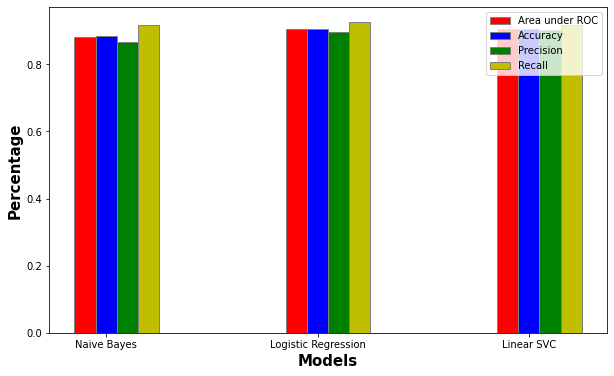

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(10, 6))

roc = [roc_nb, roc_lgr, roc_lsvc]
acc = [acc_nb, acc_lgr, acc_lsvc]
pre = [precision_nb, precision_lgr, precision_lsvc]
recall = [recall_nb, recall_lgr, recall_lsvc]

# Set position of bar on X axis
br1 = np.arange(len(roc))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
# Make the plot
plt.bar(br1, roc, color ='r', width = barWidth, edgecolor ='grey', label ='Area under ROC')
plt.bar(br2, acc, color ='b', width = barWidth, edgecolor ='grey', label ='Accuracy')
plt.bar(br3, pre, color ='g', width = barWidth, edgecolor ='grey', label ='Precision')
plt.bar(br4, recall, color ='y', width = barWidth, edgecolor ='grey', label ='Recall')
# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Percentage', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(roc))], ['Naive Bayes', 'Logistic Regression', 'Linear SVC'])
plt.legend()
plt.show()

***Prediction of New Reviews By Model***

Randomly choosen five reviews from the Kindle book The Brave Ones: A Memoir of Hope, Pride and Military Service, by Michael J.MacLeod. The suffixes "_1", "_2", ..., "_5" indicate the real overall review stars 1, 2, ..., 5.



In [85]:
review_1 = ["WOW!!! No words describe how bland this book is. It took me a lot to even pick up to read. I would definitely not recommend this book."]
review_2 = ["A first person account of the war in Afghanistan. It skipps around a lot and is like a never-ending news article. On the positive side, you do get a feel for what desert fighting is like from a soldiers point of view."]
review_3 = ["I liked the premise and most of the book. At the end parts I lost a little interest because I lost the thread of who was who. War is hell. MacLeod did his service unlike most of us."]
review_4 = ["Very informative first person account of the the daily life of a US Paratrooper. From training to deployment in combat situations in Afghanistan. Well worth the read and makes you really understand and appreciate their sacrifices"]
review_5 = ["This is perhaps the best wrote book I have ever read. Articulate and thought provoking. Not just a riveting account of actual combat, but Michael was able to do what few before him have...captured the essence of what one feels as the battle unfolds. Perhaps most of all, I am grateful to call this author 'Fellow Warrior' Airborne all the way!!!"]

In [86]:
from pyspark.sql.types import *
schema = StructType([StructField("text", StringType(), True)])

text = [review_1, review_2, review_3, review_4, review_5]
review_new = spark.createDataFrame(text, schema=schema)

In [87]:
# Data preprocessing
review_new_tokens = review_new.withColumn('tokens', clean_udf(col('text')))
review_new_tokens.show()

+--------------------+--------------------+
|                text|              tokens|
+--------------------+--------------------+
|WOW!!! No words d...|[wow, not_word, n...|
|A first person ac...|[a, first, person...|
|I liked the premi...|[i, liked, the, p...|
|Very informative ...|[very, informativ...|
|This is perhaps t...|[this, is, perhap...|
+--------------------+--------------------+



In [88]:
# Prediction using Naive Bayes Model
result = model_nb.transform(review_new_tokens)
result.select('text', 'prediction').show()

+--------------------+----------+
|                text|prediction|
+--------------------+----------+
|WOW!!! No words d...|       1.0|
|A first person ac...|       1.0|
|I liked the premi...|       1.0|
|Very informative ...|       0.0|
|This is perhaps t...|       0.0|
+--------------------+----------+



In [89]:
# Prediction using Logistic Regression Model
result = model_lgr.transform(review_new_tokens)
result.select('text', 'prediction').show()

+--------------------+----------+
|                text|prediction|
+--------------------+----------+
|WOW!!! No words d...|       1.0|
|A first person ac...|       1.0|
|I liked the premi...|       1.0|
|Very informative ...|       0.0|
|This is perhaps t...|       0.0|
+--------------------+----------+



In [90]:
# Prediction using Linear SVC Model
result = model_lsvc.transform(review_new_tokens)
result.select('text', 'prediction').show()

+--------------------+----------+
|                text|prediction|
+--------------------+----------+
|WOW!!! No words d...|       1.0|
|A first person ac...|       1.0|
|I liked the premi...|       1.0|
|Very informative ...|       0.0|
|This is perhaps t...|       0.0|
+--------------------+----------+

